In [1]:
import opsimsummaryv2 as op
from urllib.request import urlretrieve
from pathlib import Path

In [2]:
# Download the db file if needed
op.utils.download_rubinlsst_baseline_dbfile(4.3, output_dir='./example_files/')

Download completed in -8min:37.71sec !


In [3]:
# Opening the database
OpSimSurv = op.OpSimSurvey('./example_files/baseline_v4.3_10yrs.db')

Reading from database sqlite:///./example_files/baseline_v4.3_10yrs.db
Read N = 2015407 observations in 23.34 seconds.
No host file.


In [5]:
# Compute the healpy representation of the survey with a cut to a minimum of 500 and a maximum of 10000 visits
OpSimSurv.compute_hp_rep(nside=256, minVisits=500, maxVisits=100_000)

Finished compute healpy representation, total number of fields : 389565.


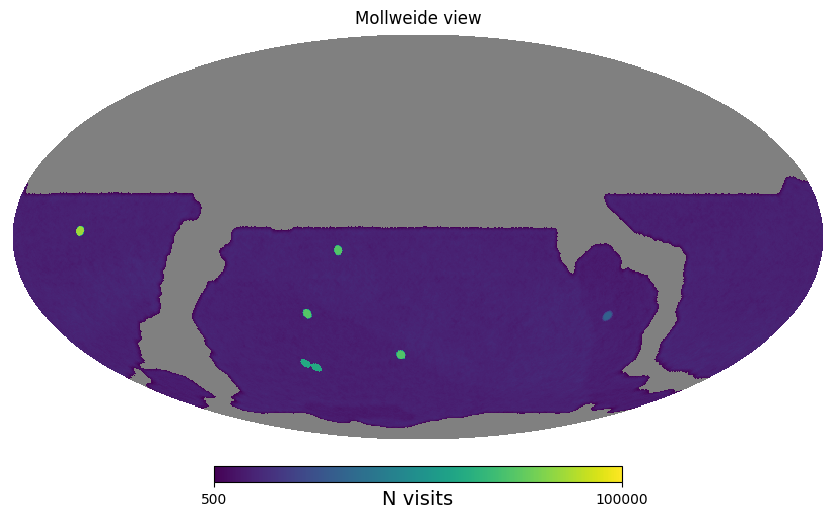

In [7]:
# Plot the healpy configuration
fig = OpSimSurv.plot_hp_rep(min=500, max=100_000, norm='log')

In [12]:
# Sample the survey
N_fields = 100
seed = 1234

# Sample the suvey with 100 fields
OpSimSurv.sample_survey(N_fields, random_seed=seed)

In [13]:
# Survey pointings
OpSimSurv.survey.field_label.unique()

array(['WFD', 'DDF'], dtype=object)

In [14]:
# Getting observations
Obs = OpSimSurv.get_survey_obs()

In [15]:
# Obs is an iterator
First_obs = next(Obs)

In [16]:
First_obs

,ObsID,expMJD,PSF,ZPT,SKYSIG,BAND
0,1903708,64432.148800,1.697371,31.668057,22.813636,g
1,719453,62311.002596,1.830605,30.208938,51.239954,y
2,1633975,63987.376543,1.916135,31.309077,77.761094,z
3,1913628,64443.229042,2.080946,31.312278,61.885694,z
4,1913679,64443.253651,3.834575,30.187512,48.764623,y
...,...,...,...,...,...,...
788,261686,61470.353785,1.722212,31.708017,26.249706,r
789,102932,61183.241911,1.942796,30.107136,46.734154,y
790,701607,62271.099493,1.731117,31.288973,50.122744,z
791,102881,61183.217623,2.443760,31.274620,51.095329,z


In [17]:
# Writing simlib
sim = op.sim_io.SNANA_Simlib(OpSimSurv, out_path='./example_files/')
sim.write_SIMLIB()

Writing SIMLIB in example_files/baseline_v4.3_10yrs.SIMLIB
SIMLIB wrote in 0.53 sec.

